In [6]:
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
# Load the dataset
df = pd.read_csv('sample_option_data.csv')

# Extract relevant columns
S = df['StockPrice']
K = df['StrikePrice'].iloc[0]  
T = df['TimeToMaturity']
r = df['RiskFreeRate'].iloc[0]  
sigma = df['Volatility'].iloc[0]  


S_grid, t_grid = np.meshgrid(S, T)

In [8]:
# Create a grid for stock prices and time
S_grid, t_grid = np.meshgrid(S, T)

# Calculate d1 and d2 using the Black-Scholes formula
d1 = (np.log(S_grid / K) + (r + 0.5 * sigma**2) * t_grid) / (sigma * np.sqrt(t_grid))
d2 = d1 - sigma * np.sqrt(t_grid)

# Calculate the call and put option prices
call = S_grid * norm.cdf(d1) - K * np.exp(-r * t_grid) * norm.cdf(d2)
put = K * np.exp(-r * t_grid) * norm.cdf(-d2) - S_grid * norm.cdf(-d1)


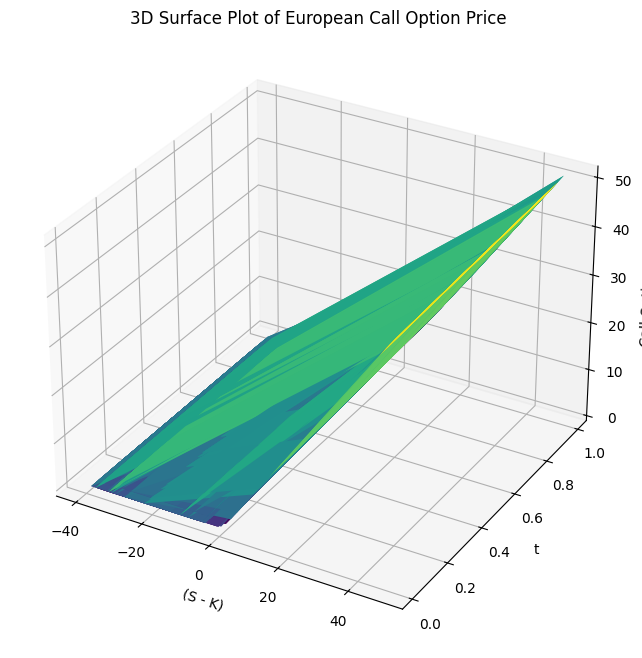

In [9]:
# Plot the 3D surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

# Plot the surface
ax.plot_surface(S_grid - K, t_grid, call, cmap='viridis')
# ax.view_init(azim=90)
# Labels and title
ax.set_xlabel('(S - K)')
ax.set_ylabel('t')
ax.set_zlabel('Call Option Price')
ax.set_title('3D Surface Plot of European Call Option Price')

plt.show()